<a href="https://colab.research.google.com/github/laufragor/nlp-spam-detection/blob/main/NLP_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREARE UN SISTEMA DI SPAM DETECTION**

L'azienda ProfessionAI vuole realizzare una libreria capace di fare analisi delle email ricevute.

Nello specifico, il CEO ha richiesto di identificare le email di tipo SPAM sulle quali fare analisi contenutistiche.

Il CTO nello specifico ti fornisce un dataset e ti chiede di:
- Addestrare un classificatore per identificare SPAM
- Individuare i Topic principali tra le email SPAM presenti nel dataset
- Calcolare la distanza semantica tra i topics ottenuti, per dedurne l'eterogeneità.
- Estrarre dalle mail NON SPAM le Organizzazioni presenti.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

from google.colab import files
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
eng_stopwords = stopwords.words('english')
email_stopwords = ["subject", "email", "dear"]    # parole comuni nelle email
STOP_WORDS = eng_stopwords + email_stopwords

In [ ]:
df = pd.read_csv('./spam_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
# La colonna "Unnamed: 0" non è utile, la rimuovo
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# Controllo valori mancanti
df.isna().sum().sum()

0

# ***1) Addestrare un classificatore per identificare SPAM***

In [ ]:
# Verifico se il dataset è bilanciato (è abbastanza bilanciato)
df.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [ ]:
emails = df.text.values
labels = df.label_num.values

### Preprocessing testo per classificatore

In [ ]:
emails = [simple_preprocess(email, deacc=True) for email in emails]
emails = [" ".join(w for w in email if w not in STOP_WORDS and len(w) >= 4)
          for email in emails]
emails[0]

'enron methanol meter follow note gave monday preliminary flow data provided daren please override daily volume presently zero reflect daily activity obtain control change needed asap economics purposes'

### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.2,
                                                    stratify=labels)

### Codifica testo

In [ ]:
tfidfv = TfidfVectorizer()
X_train = tfidfv.fit_transform(X_train)
X_test = tfidfv.transform(X_test)

### Classificatore (rete neurale)

In [ ]:
clf = MLPClassifier(activation="logistic",
                    solver="adam",
                    max_iter=100,
                    hidden_layer_sizes=(100,),
                    tol=0.005,
                    verbose=True)

In [ ]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.61137509
Iteration 2, loss = 0.55655803
Iteration 3, loss = 0.52234537
Iteration 4, loss = 0.48607521
Iteration 5, loss = 0.44383778
Iteration 6, loss = 0.39720603
Iteration 7, loss = 0.34792302
Iteration 8, loss = 0.29909041
Iteration 9, loss = 0.25414363
Iteration 10, loss = 0.21500408
Iteration 11, loss = 0.18219205
Iteration 12, loss = 0.15526190
Iteration 13, loss = 0.13357443
Iteration 14, loss = 0.11587845
Iteration 15, loss = 0.10150714
Iteration 16, loss = 0.08971319
Iteration 17, loss = 0.08001300
Iteration 18, loss = 0.07189801
Iteration 19, loss = 0.06503591
Iteration 20, loss = 0.05928659
Iteration 21, loss = 0.05439237
Iteration 22, loss = 0.05007747
Iteration 23, loss = 0.04642282
Iteration 24, loss = 0.04323331
Iteration 25, loss = 0.04043501
Iteration 26, loss = 0.03800879
Iteration 27, loss = 0.03580194
Iteration 28, loss = 0.03385499
Iteration 29, loss = 0.03209102
Iteration 30, loss = 0.03053870
Iteration 31, loss = 0.02913437
Training loss did

MLPClassifier(activation='logistic', max_iter=100, tol=0.005, verbose=True)

In [ ]:
# Accuracy score
clf.score(X_test, y_test)

0.9893719806763285

### Valutazione risultati

In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       735
           1       0.97      0.99      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



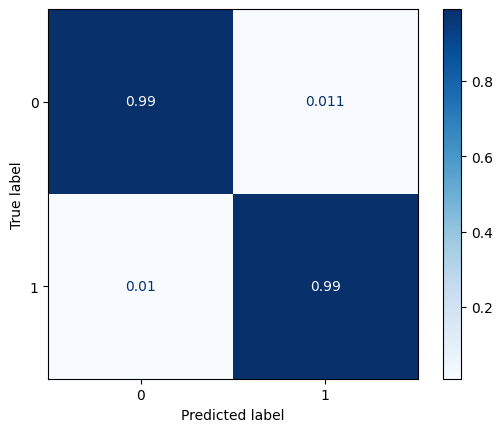

In [ ]:
# Matrice di confusione normalizzata
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        normalize='true',
                                        cmap="Blues");

# ***2) Individuare i Topic principali tra le email SPAM presenti nel dataset***

In [ ]:
import gensim
from gensim.corpora import Dictionary
from pprint import pprint

N_TOPICS = 10

In [ ]:
spam_emails = df[df['label_num'] == 1]['text'].values

### Preprocessing testo per topic modeling

In [ ]:
spam_emails = [simple_preprocess(email, deacc=True) for email in spam_emails]
spam_emails = [[w for w in email if w not in STOP_WORDS and len(w) >= 4]
               for email in spam_emails]

### Dizionario e codifica testo

In [ ]:
dct = Dictionary(spam_emails)
corpus = [dct.doc2bow(doc) for doc in spam_emails]

### Modello LDA

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dct, num_topics=N_TOPICS, passes=5)

### Topic individuati

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.005*"microsoft" + 0.004*"said" + 0.004*"download" + 0.004*"software" + '
  '0.003*"windows" + 0.003*"available" + 0.003*"http" + 0.003*"office" + '
  '0.003*"information" + 0.002*"price"'),
 (1,
  '0.027*"font" + 0.021*"height" + 0.019*"http" + 0.017*"width" + '
  '0.013*"align" + 0.013*"size" + 0.011*"border" + 0.010*"color" + '
  '0.010*"face" + 0.009*"href"'),
 (2,
  '0.012*"company" + 0.008*"statements" + 0.006*"pills" + 0.006*"information" '
  '+ 0.005*"within" + 0.005*"report" + 0.005*"investment" + 0.005*"securities" '
  '+ 0.004*"stock" + 0.004*"looking"'),
 (3,
  '0.024*"nbsp" + 0.005*"http" + 0.002*"music" + 0.002*"content" + '
  '0.002*"please" + 0.002*"find" + 0.002*"many" + 0.002*"check" + 0.002*"info" '
  '+ 0.002*"software"'),
 (4,
  '0.010*"computron" + 0.007*"contact" + 0.007*"message" + 0.006*"please" + '
  '0.006*"free" + 0.005*"mail" + 0.005*"reply" + 0.004*"link" + 0.004*"prices" '
  '+ 0.004*"remove"'),
 (5,
  '0.004*"http" + 0.003*"click" + 0.003*"pleas

# ***3) Calcolare la distanza semantica tra i topics ottenuti, per dedurne l'eterogeneità.***

In [ ]:
from scipy.spatial import distance

### Ottengo i topic codificati

In [ ]:
topics = lda_model.get_topics()
topics.shape

(10, 33966)

### Matrice di similarità topic-topic

In [ ]:
topic_similarity_matrix = np.zeros((N_TOPICS, N_TOPICS))

for i in range(10):
    for j in range(10):
        if i != j:
            topic_similarity_matrix[i][j] = 1 - distance.cosine(topics[i], topics[j])

In [ ]:
print(topic_similarity_matrix.round(2))

[[0.   0.13 0.35 0.24 0.4  0.48 0.54 0.46 0.43 0.42]
 [0.13 0.   0.1  0.22 0.1  0.19 0.22 0.42 0.22 0.13]
 [0.35 0.1  0.   0.21 0.37 0.41 0.41 0.37 0.36 0.77]
 [0.24 0.22 0.21 0.   0.21 0.33 0.29 0.33 0.28 0.26]
 [0.4  0.1  0.37 0.21 0.   0.45 0.43 0.35 0.31 0.37]
 [0.48 0.19 0.41 0.33 0.45 0.   0.51 0.56 0.51 0.45]
 [0.54 0.22 0.41 0.29 0.43 0.51 0.   0.58 0.51 0.43]
 [0.46 0.42 0.37 0.33 0.35 0.56 0.58 0.   0.51 0.39]
 [0.43 0.22 0.36 0.28 0.31 0.51 0.51 0.51 0.   0.35]
 [0.42 0.13 0.77 0.26 0.37 0.45 0.43 0.39 0.35 0.  ]]


### Trovo i due topic più simili tra loro

In [ ]:
max_similarity = np.max(topic_similarity_matrix)
max_simil_row, max_simil_col = np.unravel_index(np.argmax(topic_similarity_matrix),
                                               (N_TOPICS, N_TOPICS))
print("Max similarity = {:.3f}\n is between topic {} and {}".format(max_similarity,
                                                                max_simil_row, max_simil_col))

Max similarity = 0.767
 is between topic 2 and 9


### Mostro i due topic più simili

In [ ]:
print(f"TOPIC {max_simil_row}:")
pprint(lda_model.print_topic(max_simil_row))

print(f"\nTOPIC {max_simil_col}:")
pprint(lda_model.print_topic(max_simil_col))

TOPIC 2:
('0.012*"company" + 0.008*"statements" + 0.006*"pills" + 0.006*"information" + '
 '0.005*"within" + 0.005*"report" + 0.005*"investment" + 0.005*"securities" + '
 '0.004*"stock" + 0.004*"looking"')

TOPIC 9:
('0.006*"company" + 0.005*"statements" + 0.004*"information" + 0.003*"calls" + '
 '0.003*"forward" + 0.003*"within" + 0.002*"news" + 0.002*"securities" + '
 '0.002*"money" + 0.002*"please"')


La similarità è alta (0.77), entrambi i topic ruotano intorno a parole relative ad aziende, statements, informazione, sicurezza...

# ***4) Estrarre dalle mail NON SPAM le Organizzazioni presenti.***

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Qui non preprocesso il testo
# perché i nomi delle organizzazioni possono includere simboli e parole comuni.
nonspam_emails = df[df['label_num'] == 0].text.values
nonspam_emails[0]

"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes ."

### Trovo le organizzazioni per ogni email non-spam
Siccome il nome di un'organizzazione può essere composto da più token, se procedessi in modo naive otterrei che i nomi delle organizzazioni "scomposti" in parole individuali. Per risolvere, procedo nel modo seguente.  
Per ogni documento:
* scorro i token finché non ne raggiungo uno che ha ent_type_ == "ORG"
* salvo quel token, e tutti quelli immediatamente successivi di tipo "ORG",  in una lista
* Continuo allo stesso modo fino alla fine del documento.

In [ ]:
# Dizionario
# chiave = nome organizzazione
# valore = #volte che compare tale organizzazione
orgs = {}


for email in nonspam_emails:
    doc = nlp(email)

    is_org = False
    current_org = []

    # per ogni email non-spam
    for token in doc:

        # se il token preceedente non era di tipo "ORG"
        if not is_org:
            if token.ent_type_ == "ORG":
                is_org = True
                current_org.append(str(token))
        # se il token precedente era di tipo "ORG"
        else:
            if token.ent_type_ == "ORG":
                current_org.append(str(token))
            else:
                is_org = False
                org = " ".join(current_org)
                if org not in orgs:
                    orgs[org] = 1
                else:
                    orgs[org] = orgs[org] + 1
                current_org = []

### Mostro le organizzazioni presenti in tutte le email non-spam
In ordine decrescente di frequenza:

In [ ]:
orgs = sorted(orgs.items(), key=lambda item: item[1], reverse=True)
pprint(orgs)

[('tenaska', 365),
 ('enron', 232),
 ('north america corp .', 185),
 ('ami chokshi / corp /', 153),
 ('exxon', 91),
 ('hplc', 88),
 ('pat clynes / corp / enron @ enron', 75),
 ('enron corp .', 53),
 ('pat clynes / corp /', 52),
 ('stella l morris', 51),
 ('texas 77002', 50),
 ('enron north america corp .', 50),
 ('enron capital & trade resources corp .', 45),
 ('coastal oil & gas corporation \n albrecht', 43),
 ('/ corp /', 40),
 ('gcs / cec / pec @', 39),
 ('ami chokshi / corp / enron @ enron \n', 35),
 ('pat clynes / corp / enron @ enron \n subject', 35),
 ('duke', 34),
 ('pat \n clynes / corp / enron @ enron', 32),
 ('pg & e', 32),
 ('& p', 31),
 ('pat clynes / corp / enron @ enron \n', 30),
 ('parker / corp /', 29),
 ('neuweiler', 28),
 ('speckels', 28),
 ('el paso', 27),
 ('enron methanol', 27),
 ('mobil', 27),
 ('yahoo', 27),
 ('mack / corp / enron @ enron', 26),
 ('chevron', 26),
 ('ferc', 26),
 ('lone star', 24),
 ('texaco', 24),
 ('mips', 24),
 ('smith', 24),
 ('megan parker /